In [2]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

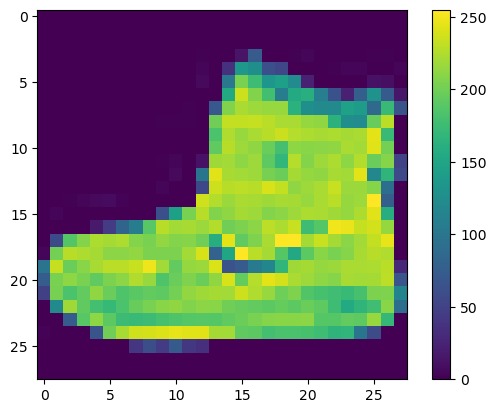

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

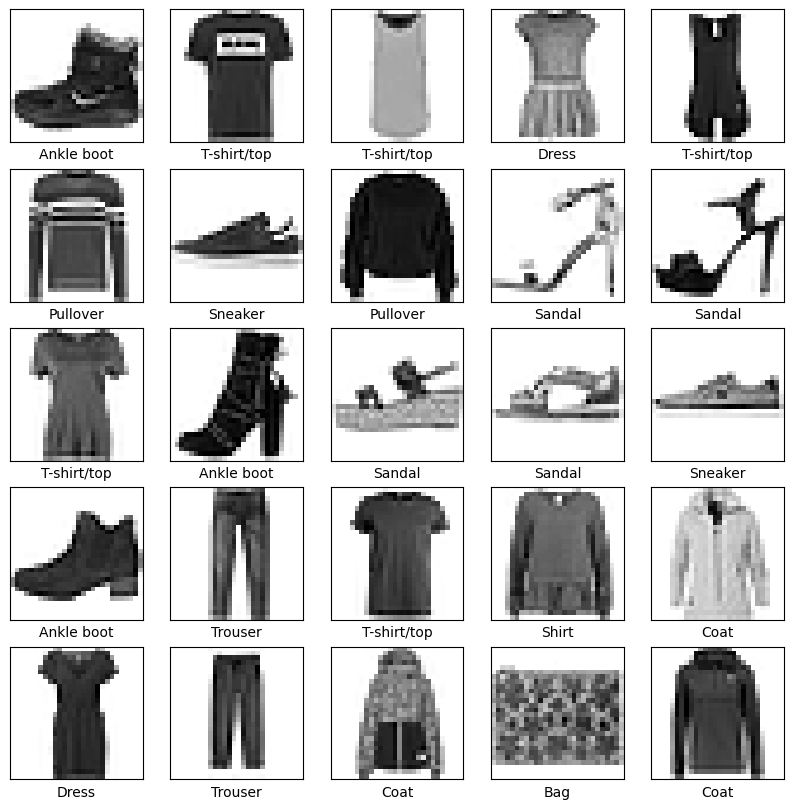

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2023-04-01 21:00:04.820869: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 21:00:04.822853: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4992 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3753 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3377 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3120 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2944 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2797 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2683 - accuracy: 0.8988
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2575 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2483 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3552 - accuracy: 0.8779 - 1s/epoch - 4ms/step

Test accuracy: 0.8779000043869019


In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [20]:
predictions[0]

array([1.80342119e-09, 4.10324080e-10, 1.98756497e-10, 1.03339104e-07,
       6.86542023e-08, 1.60416079e-04, 4.96563075e-07, 3.30532086e-03,
       5.57433033e-09, 9.96533632e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

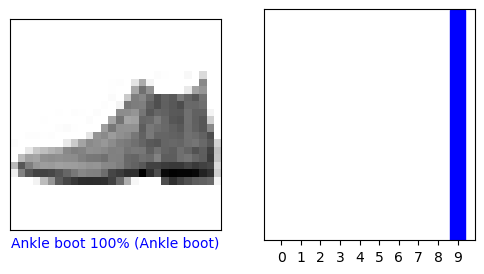

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

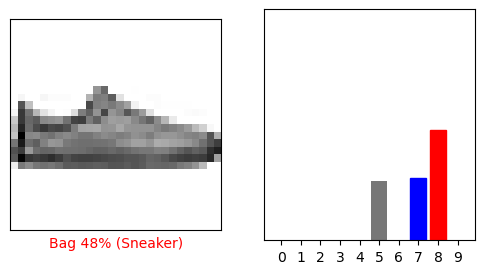

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

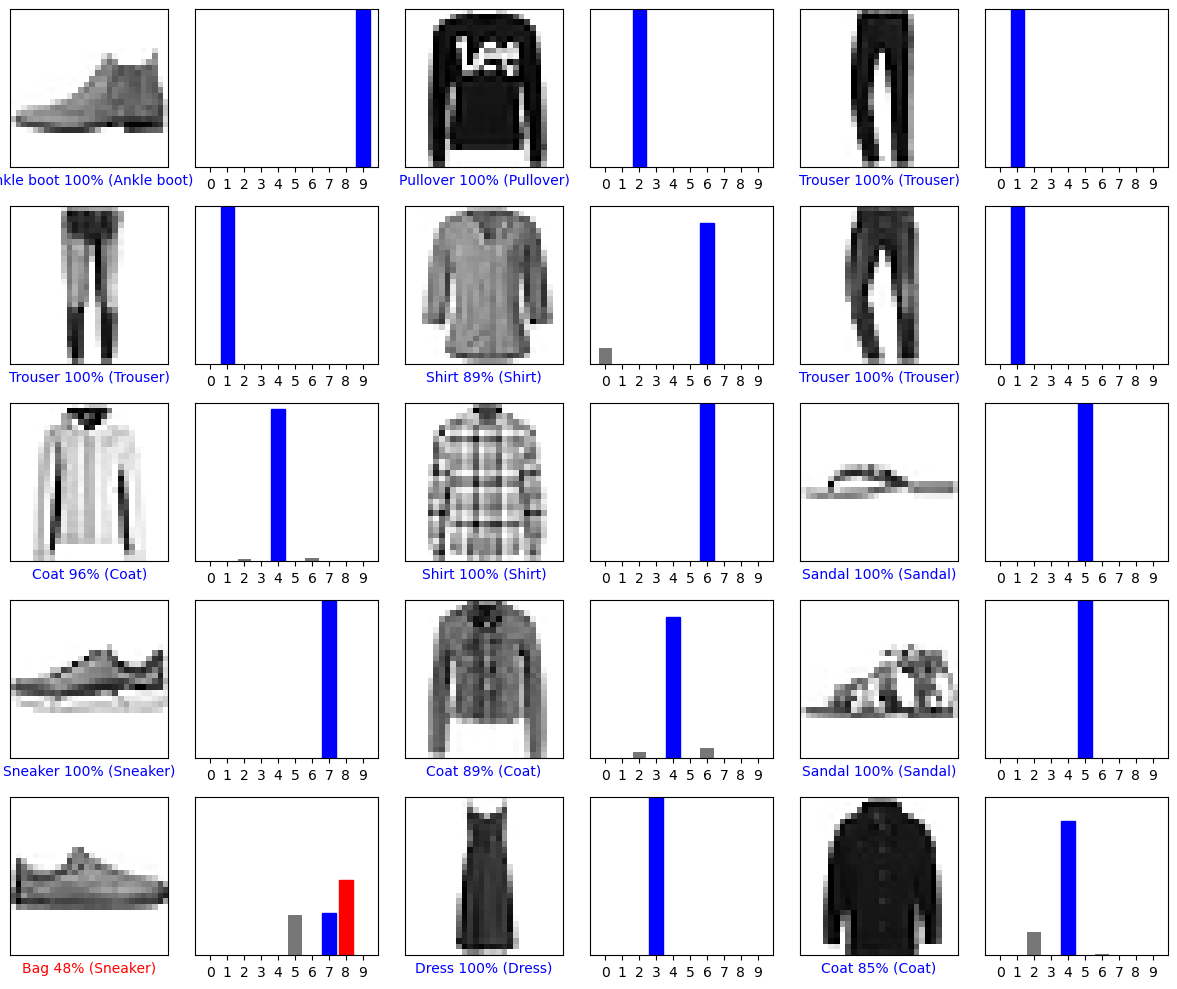

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 17ms/step
[[2.2783490e-05 4.0545671e-11 9.9516195e-01 6.5671590e-10 9.4546459e-04
  7.2498790e-14 3.8697817e-03 1.0262096e-11 1.4723008e-11 2.1263039e-12]]


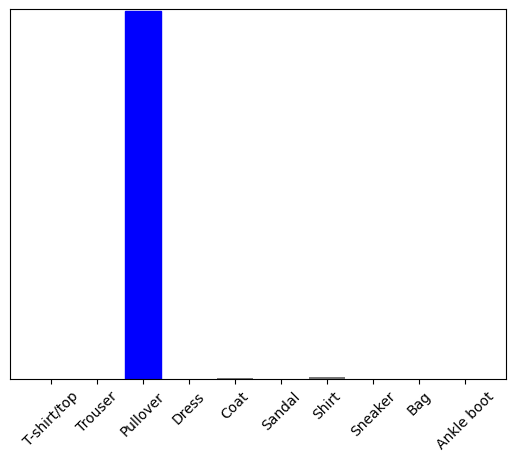

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [31]:
np.argmax(predictions_single[0])

2